In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display

##### !pip install kaggle
##### import kaggle
##### from kaggle.api.kaggle_api_extended import KaggleApi
##### api = KaggleApi()
##### api.authenticate() 
##### Hi Professor: Since Kaggle needs Authorization to download the data through URL, You may need to have kaggle account, and download API token in Kaggle account profile(kaggle.json), then put it in  C:\Users\account\.kaggle file.
##### api.dataset_download_file('austinreese/usa-housing-listings','housing.csv')

##### import zipfile
##### with zipfile.ZipFile('housing.csv.zip','r') as zipref:
#####    zipref.extractall()
##### Just an example. But this way requires the users to download kaggle.json file and put it in C:\user\account\.kaggle file.
##### If professor has a kaggle account, please remove the quotations and run the code,
##### If not, please use the method below, which doesn't need kaggle account.

In [2]:
# Dataset Imported & Columns Dropped
df=pd.read_csv('https://media.githubusercontent.com/media/HereLegend/data/main/housing.csv')
CA = (df.loc[(df['state'])=='ca']).drop(['id','url','region_url','image_url','dogs_allowed','description','lat','long','state'],1)
CA.rename(columns = {'cats_allowed':'pets_allowed'}, inplace = True) 
CA

region  price       type  sqfeet  beds  baths  pets_allowed  \
0       reno / tahoe   1148  apartment    1078     3    2.0             1   
1       reno / tahoe   1200      condo    1001     2    2.0             0   
2       reno / tahoe   1813  apartment    1683     2    2.0             1   
3       reno / tahoe   1095  apartment     708     1    1.0             1   
4       reno / tahoe    289  apartment     250     0    1.0             1   
...              ...    ...        ...     ...   ...    ...           ...   
384972  reno / tahoe   1295  apartment     957     2    2.0             1   
384973  reno / tahoe   1549  apartment    1034     2    2.0             1   
384974  reno / tahoe   1249  apartment     840     2    1.0             1   
384975  reno / tahoe   1429  apartment     976     2    2.0             1   
384976  reno / tahoe   1295  apartment     957     2    2.0             1   

        smoking_allowed  wheelchair_access  electric_vehicle_charge  \
0                     0                  0                        0   
1                     0                  0                        0   
2                     1                  0                        0   
3                     1                  0                        0   
4                     1                  1                        0   
...                 ...                ...                      ...   
384972                1                  0                        0   
384973                0                  0                        0   
384974                1                  0                        0   
384975                1                  0                        0   
384976                1                  0                        0   

        comes_furnished  laundry_options     parking_options  
0                     0      w/d in unit             carport  
1                     0      w/d hookups             carport  
2                     0      w/d in unit     attached garage  
3                     0      w/d in unit             carport  
4                     1  laundry on site                 NaN  
...                 ...              ...                 ...  
384972                0      w/d in unit             carport  
384973                0      w/d in unit                 NaN  
384974                0  laundry on site  off-street parking  
384975                0      w/d in unit             carport  
384976                0      w/d in unit             carport  

[33085 rows x 13 columns]

In [3]:
# Null Value Checked
CA.isnull().sum()

region                        0
price                         0
type                          0
sqfeet                        0
beds                          0
baths                         0
pets_allowed                  0
smoking_allowed               0
wheelchair_access             0
electric_vehicle_charge       0
comes_furnished               0
laundry_options            5067
parking_options            8503
dtype: int64

In [4]:
# Null Value Replaced
CA['laundry_options'] = CA['laundry_options'].fillna(CA['laundry_options'].mode()[0])
CA['parking_options'] = CA['parking_options'].fillna(CA['parking_options'].mode()[0])
CA.describe()

price        sqfeet          beds         baths  pets_allowed  \
count  3.308500e+04  3.308500e+04  33085.000000  33085.000000  33085.000000   
mean   2.902897e+03  1.058994e+03      1.832190      1.514402      0.678404   
std    1.321663e+05  7.986063e+03      0.902654      0.608570      0.467096   
min    0.000000e+00  0.000000e+00      0.000000      0.000000      0.000000   
25%    1.320000e+03  7.160000e+02      1.000000      1.000000      0.000000   
50%    1.700000e+03  9.050000e+02      2.000000      1.000000      1.000000   
75%    2.220000e+03  1.109000e+03      2.000000      2.000000      1.000000   
max    2.170191e+07  1.019856e+06      7.000000      6.500000      1.000000   

       smoking_allowed  wheelchair_access  electric_vehicle_charge  \
count     33085.000000       33085.000000             33085.000000   
mean          0.700045           0.094665                 0.046426   
std           0.458245           0.292756                 0.210409   
min           0.000000           0.000000                 0.000000   
25%           0.000000           0.000000                 0.000000   
50%           1.000000           0.000000                 0.000000   
75%           1.000000           0.000000                 0.000000   
max           1.000000           1.000000                 1.000000   

       comes_furnished  
count     33085.000000  
mean          0.039383  
std           0.194508  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.000000  
max           1.000000

In [5]:
# Date Type Changed 
CA['baths']=CA['baths'].astype('int')
CA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33085 entries, 0 to 384976
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   region                   33085 non-null  object
 1   price                    33085 non-null  int64 
 2   type                     33085 non-null  object
 3   sqfeet                   33085 non-null  int64 
 4   beds                     33085 non-null  int64 
 5   baths                    33085 non-null  int32 
 6   pets_allowed             33085 non-null  int64 
 7   smoking_allowed          33085 non-null  int64 
 8   wheelchair_access        33085 non-null  int64 
 9   electric_vehicle_charge  33085 non-null  int64 
 10  comes_furnished          33085 non-null  int64 
 11  laundry_options          33085 non-null  object
 12  parking_options          33085 non-null  object
dtypes: int32(1), int64(8), object(4)
memory usage: 3.4+ MB


In [6]:
# Outliers Removed
SQFT_Outlier = ((CA["sqfeet"] < 300) | (CA["sqfeet"] > 7000) | (CA["price"] < 500) | (CA["price"] > 5000))
CA = CA[~SQFT_Outlier]
CA

region  price       type  sqfeet  beds  baths  pets_allowed  \
0       reno / tahoe   1148  apartment    1078     3      2             1   
1       reno / tahoe   1200      condo    1001     2      2             0   
2       reno / tahoe   1813  apartment    1683     2      2             1   
3       reno / tahoe   1095  apartment     708     1      1             1   
5       reno / tahoe   1093  apartment     720     1      1             1   
...              ...    ...        ...     ...   ...    ...           ...   
384972  reno / tahoe   1295  apartment     957     2      2             1   
384973  reno / tahoe   1549  apartment    1034     2      2             1   
384974  reno / tahoe   1249  apartment     840     2      1             1   
384975  reno / tahoe   1429  apartment     976     2      2             1   
384976  reno / tahoe   1295  apartment     957     2      2             1   

        smoking_allowed  wheelchair_access  electric_vehicle_charge  \
0                     0                  0                        0   
1                     0                  0                        0   
2                     1                  0                        0   
3                     1                  0                        0   
5                     1                  0                        0   
...                 ...                ...                      ...   
384972                1                  0                        0   
384973                0                  0                        0   
384974                1                  0                        0   
384975                1                  0                        0   
384976                1                  0                        0   

        comes_furnished  laundry_options     parking_options  
0                     0      w/d in unit             carport  
1                     0      w/d hookups             carport  
2                     0      w/d in unit     attached garage  
3                     0      w/d in unit             carport  
5                     0  laundry in bldg             carport  
...                 ...              ...                 ...  
384972                0      w/d in unit             carport  
384973                0      w/d in unit             carport  
384974                0  laundry on site  off-street parking  
384975                0      w/d in unit             carport  
384976                0      w/d in unit             carport  

[32028 rows x 13 columns]

<AxesSubplot:>

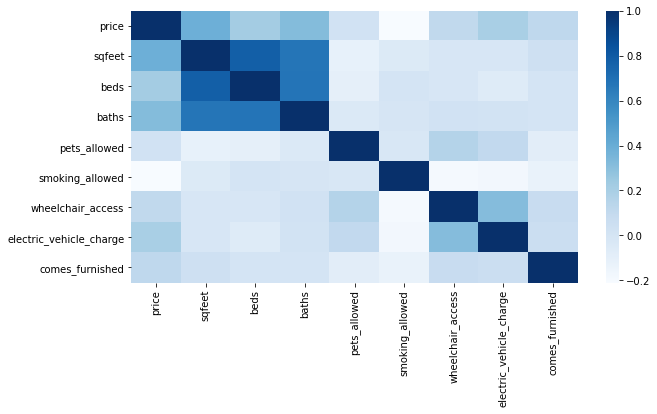

In [7]:
# Correlation 
plt.figure(figsize=(10,5))
sns.heatmap(CA.corr(),cmap='Blues')

<AxesSubplot:xlabel='count', ylabel='region'>

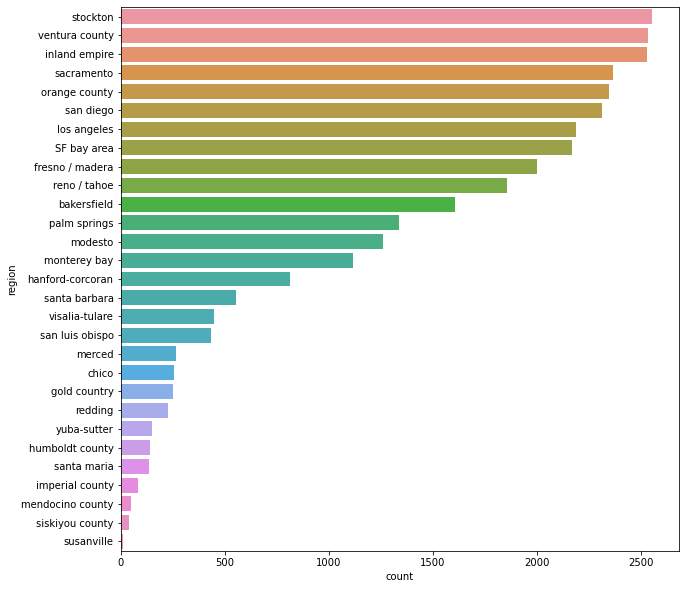

In [8]:
# Rental Distribution
plt.figure(figsize=(10,10))
sns.countplot(y='region', data = CA, order = CA['region'].value_counts().index)

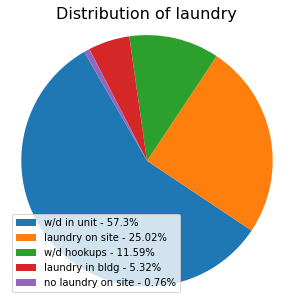

In [9]:
# Laundry
def pieplot(feature):
    fig = plt.gcf()
    fig.set_size_inches(5,5)
    feature = dict(CA[feature].value_counts())## Create new dictionary for counted variable's data
    labels = []
    sizes = []
    colors = []
    count = 0
    for k, v in feature.items():
        labels.append(f"{k} - {round(((v / CA.shape[0]) * 100), 2)}%")## have the percentage calculated
        sizes.append(v)
        count += 1

    patches, texts = plt.pie(sizes, shadow=False, startangle=120)
    plt.legend(patches, labels, loc="best")
    plt.axis('equal')
    return plt.show()
plt.title("Distribution of laundry", fontsize = 16)
pieplot('laundry_options')


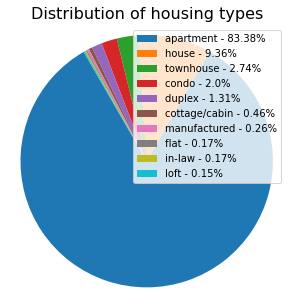

In [10]:
# Type
plt.title("Distribution of housing types", fontsize = 16)
pieplot('type')

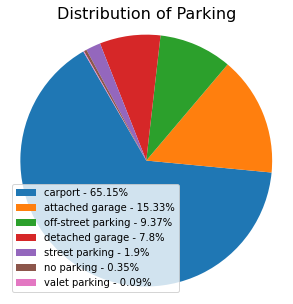

In [11]:
# Parking
plt.title("Distribution of Parking", fontsize = 16)
pieplot('parking_options')


Text(0.5, 1.0, 'Price by Region')

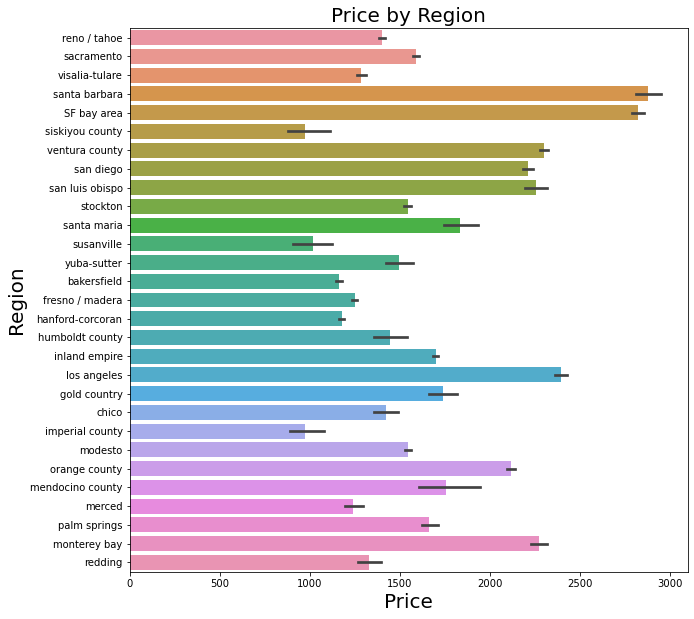

In [12]:
# Price w/ region
plt.figure(figsize=(10,10))
sns.barplot(x= 'price', y='region', data = CA)
plt.xlabel('Price', fontsize = 20)
plt.ylabel('Region', fontsize = 20)
plt.title('Price by Region', fontsize = 20)

<AxesSubplot:xlabel='sqfeet', ylabel='Price'>

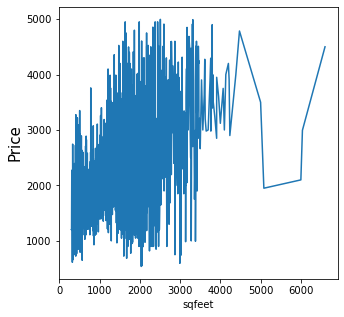

In [13]:
# Price w/ sqft
def dataplot(feature):
    plt.figure(figsize=(5,5))
    feature = CA.groupby(feature)["price"].mean().plot()
    plt.ylabel('Price', fontsize = 15)
    return feature
dataplot('sqfeet')


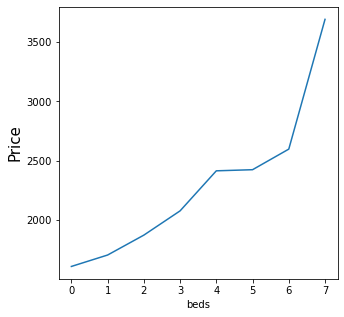

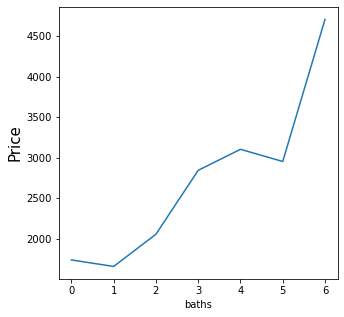

In [14]:
# Bed and Bath distribution 
beds = dataplot('beds')
baths = dataplot('baths')

<AxesSubplot:xlabel='comes_furnished', ylabel='price'>

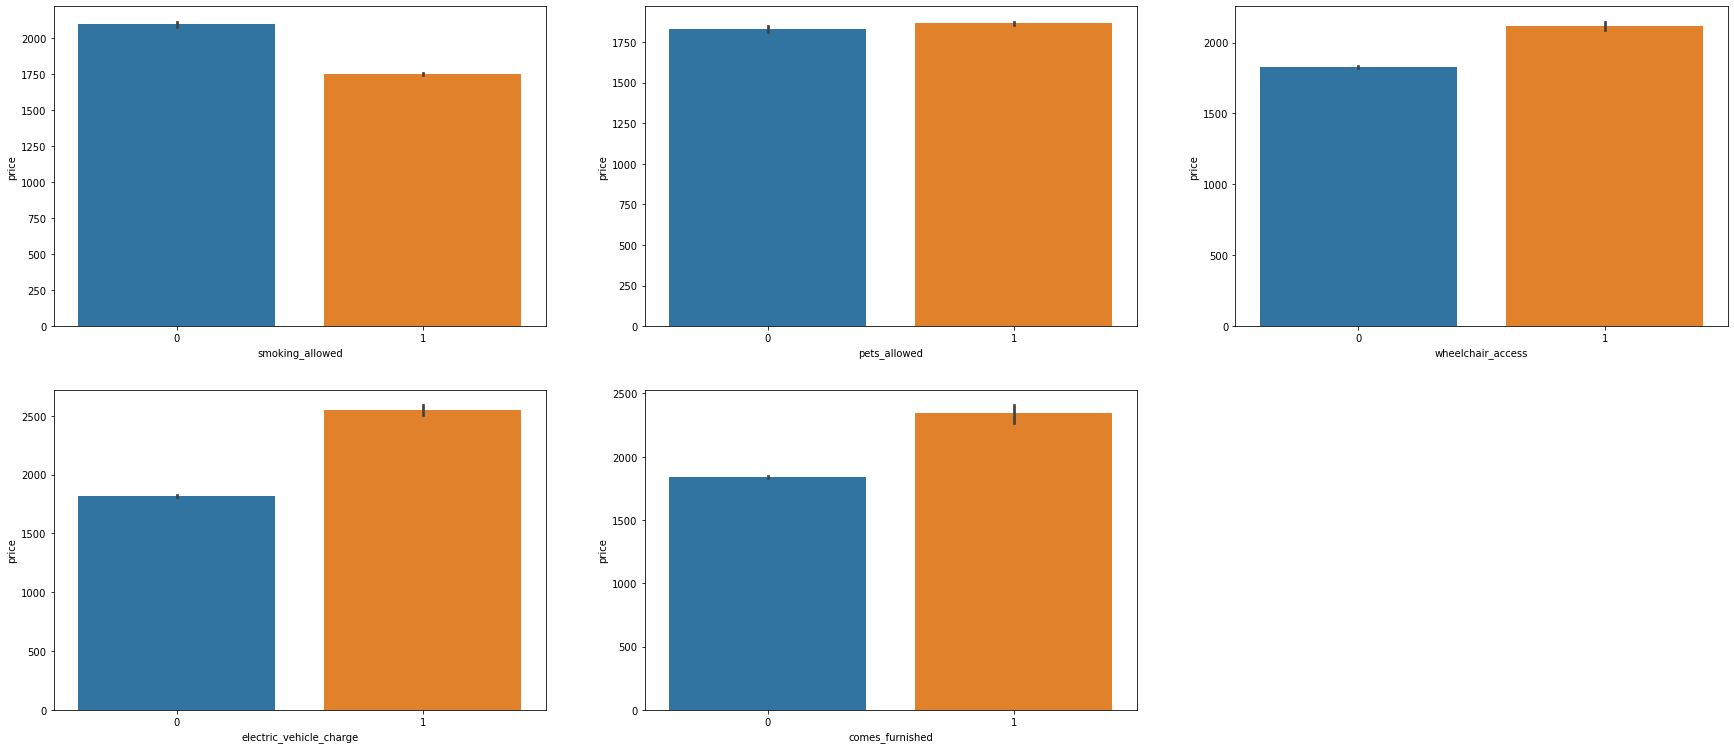

In [15]:
plt.figure(figsize=(30, 20))
plt.subplot(3, 3, 1)
sns.barplot(x='smoking_allowed', y='price', data = CA)
plt.subplot(3, 3, 2)
sns.barplot(x='pets_allowed', y='price', data = CA)
plt.subplot(3, 3, 3)
sns.barplot(x='wheelchair_access', y='price', data = CA)
plt.subplot(3, 3, 4)
sns.barplot(x='electric_vehicle_charge', y='price', data = CA)
plt.subplot(3, 3, 5)
sns.barplot(x='comes_furnished', y='price', data = CA)


<AxesSubplot:xlabel='parking_options', ylabel='price'>

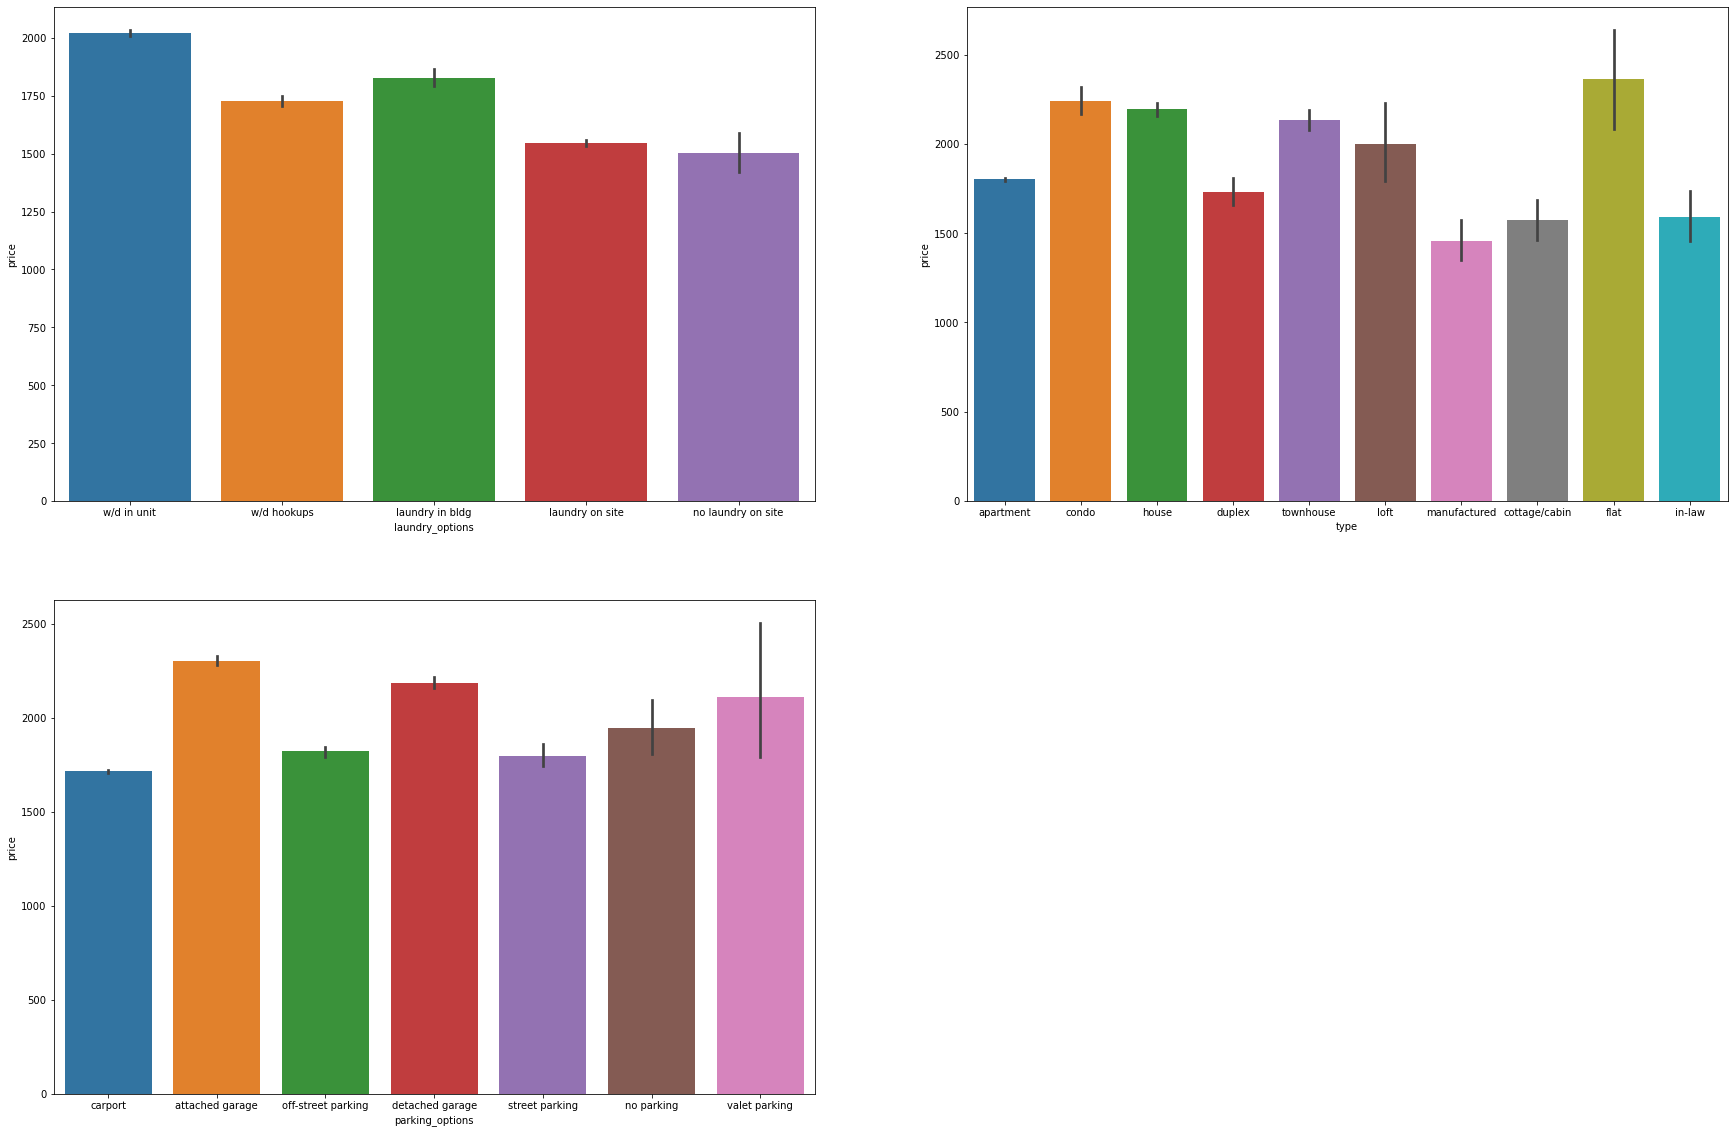

In [16]:
plt.figure(figsize=(30, 20))
plt.subplot(2, 2, 1)
sns.barplot(x='laundry_options', y='price', data = CA)
plt.subplot(2, 2, 2)
sns.barplot(x='type', y='price', data = CA)
plt.subplot(2, 2, 3)
sns.barplot(x='parking_options', y='price', data = CA)

Text(0.5, 1.0, 'Average price per year')

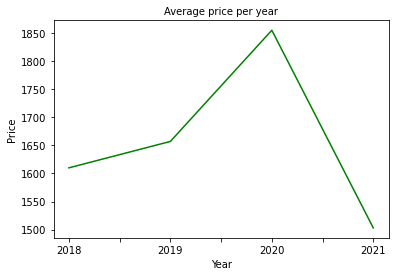

In [17]:
avg_price = pd.Series({ '2018':1610, '2019': 1657,'2020':1855, '2021':1503})
avg_price.plot(color = 'green')
plt.xlabel('Year', fontsize = 10)
plt.ylabel('Price', fontsize = 10)
plt.title('Average price per year', fontsize = 10)

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(CA["region"])  
CA["region"]=label_encoder.transform(CA["region"])  # encode labels, convert regions into different numbers
label_encoder.fit(CA["type"])
CA["type"]=label_encoder.transform(CA["type"])  # encode type, convert regions into different numbers
label_encoder.fit(CA["laundry_options"])
CA["laundry_options"]=label_encoder.transform(CA["laundry_options"])  # encode laundry_options, convert regions into different numbers
label_encoder.fit(CA["parking_options"])
CA["parking_options"]=label_encoder.transform(CA["parking_options"])  # encode parking_options, convert regions into different numbers
CA.head(20)

<ipython-input-18-e8f5c77c4bc8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA["region"]=label_encoder.transform(CA["region"])  # encode labels, convert regions into different numbers
<ipython-input-18-e8f5c77c4bc8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA["type"]=label_encoder.transform(CA["type"])  # encode type, convert regions into different numbers
<ipython-input-18-e8f5c77c4bc8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

region  price  type  sqfeet  beds  baths  pets_allowed  smoking_allowed  \
0       17   1148     0    1078     3      2             1                0   
1       17   1200     1    1001     2      2             0                0   
2       17   1813     0    1683     2      2             1                1   
3       17   1095     0     708     1      1             1                1   
5       17   1093     0     720     1      1             1                1   
6       17    935     0     661     1      1             1                1   
7       17   1095     0     708     1      1             1                1   
8       17   1525     0    1053     2      2             1                0   
9       17   1295     1     930     2      2             0                0   
10      17   1086     0     720     1      1             0                1   
11      17   2195     5    3115     4      3             0                0   
12      17   1159     0    1181     3      2             1                1   
13      17   1349     0     766     1      1             1                0   
14      17   1449     0     764     1      1             1                1   
15      17   1295     0     951     2      2             0                0   
16      17    982     0     919     2      2             1                0   
17      17   1895     0    1193     2      2             1                0   
18      17   1495     3    1192     3      1             1                0   
19      17   1899     5    1600     3      2             0                0   
20      17   1075     0     890     2      2             1                1   

    wheelchair_access  electric_vehicle_charge  comes_furnished  \
0                   0                        0                0   
1                   0                        0                0   
2                   0                        0                0   
3                   0                        0                0   
5                   0                        0                0   
6                   0                        0                0   
7                   0                        0                0   
8                   0                        0                0   
9                   0                        0                0   
10                  0                        0                0   
11                  0                        0                0   
12                  0                        0                0   
13                  0                        0                0   
14                  0                        0                0   
15                  0                        0                0   
16                  0                        0                0   
17                  0                        0                0   
18                  0                        0                0   
19                  0                        0                0   
20                  0                        0                0   

    laundry_options  parking_options  
0                 4                1  
1                 3                1  
2                 4                0  
3                 4                1  
5                 0                1  
6                 1                4  
7                 4                1  
8                 4                1  
9                 4                1  
10                4                1  
11                3                0  
12                4                1  
13                4                1  
14                4                4  
15                4                4  
16                4                1  
17                4                0  
18                3                2  
19                4                0  
20                1                4

In [19]:
x=CA.drop(columns=["price"])
y=CA["price"]

<AxesSubplot:>

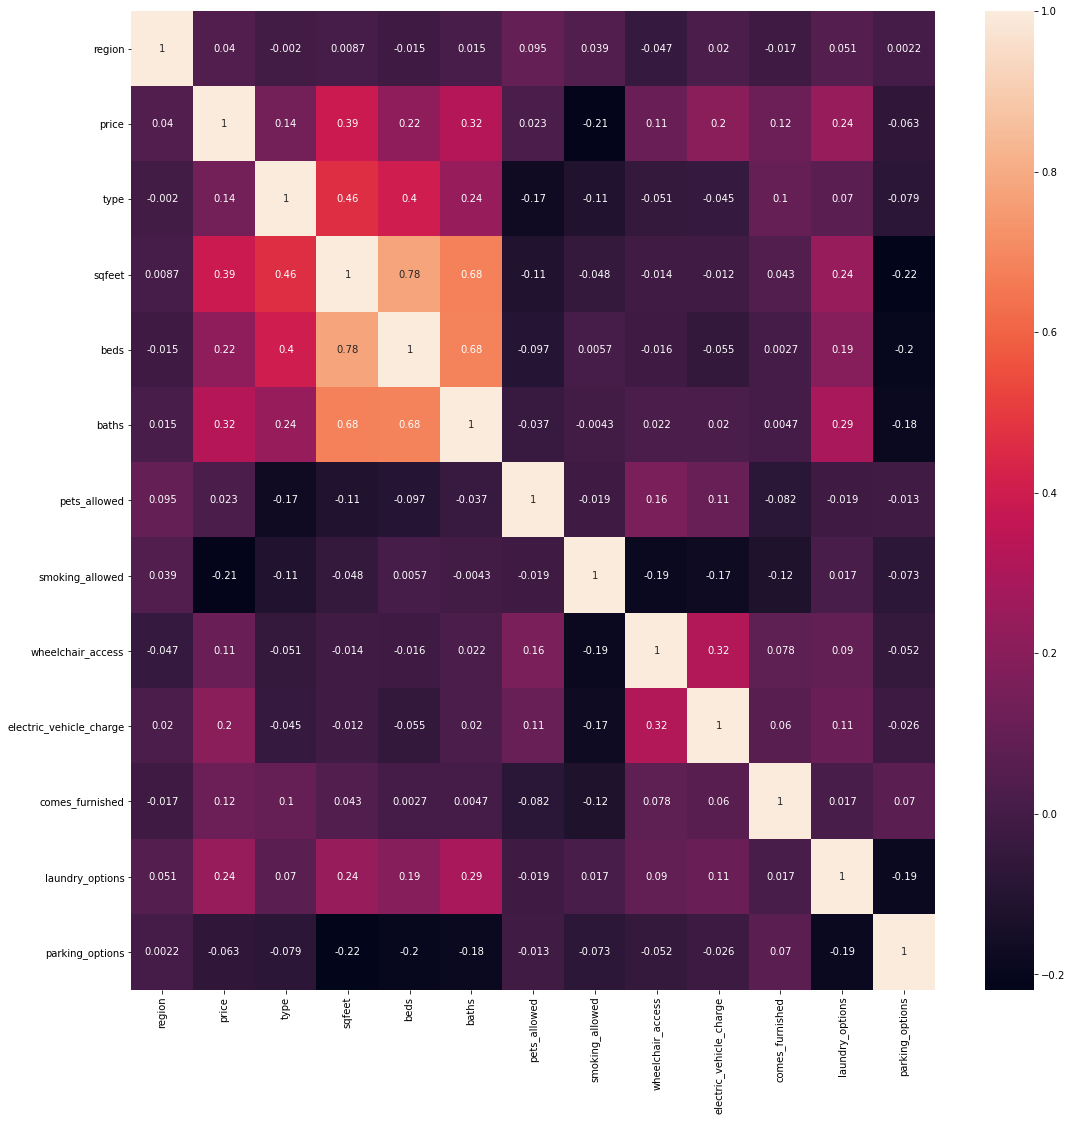

In [20]:
plt.figure(figsize=(18,18))
sns.heatmap(CA.corr(), annot=True)

### Regression--GradientBoostingRegressor

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=100)
gbr.fit(x_train,y_train)
y_pred= gbr.predict(x_test)
gbr_r2=metrics.r2_score(y_test, y_pred)
gbr_MSE=metrics.mean_squared_error(y_test, y_pred)
gbr_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [23]:
gbr2=gbr.fit(x_train,y_train)

Feature: 0, Score: 0.58358
Feature: 1, Score: 0.00272
Feature: 2, Score: 0.24876
Feature: 3, Score: 0.00374
Feature: 4, Score: 0.02438
Feature: 5, Score: 0.00566
Feature: 6, Score: 0.01428
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.02514
Feature: 9, Score: 0.00739
Feature: 10, Score: 0.05079
Feature: 11, Score: 0.03358


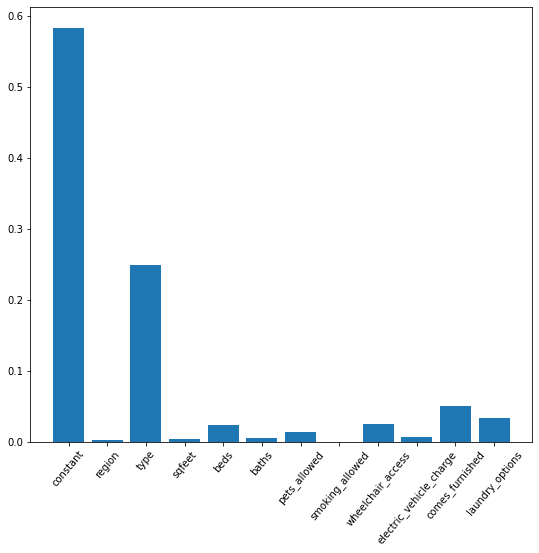

In [24]:
#### Get importance
importance_gbr2 = gbr2.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_gbr2):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.subplots(figsize=(9,8))
plt.bar([x for x in range(len(importance_gbr2))], importance_gbr2)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['constant','region','type', 'sqfeet', 'beds','baths','pets_allowed', 'smoking_allowed','wheelchair_access', 'electric_vehicle_charge','comes_furnished', 'laundry_options'],rotation=50)
plt.show();

In [25]:
print("R^2 Score:", gbr_r2)
print("MSE Score:", gbr_MSE)
print("RMSE Score:", gbr_RMSE)

R^2 Score: 0.6959472422338646
MSE Score: 171309.7316872356
RMSE Score: 413.8957981028988


In [26]:
pred_graph_gbr=pd.DataFrame({"True Values":y_test, "Predicted Values":y_pred})
pred_graph_gbr

True Values  Predicted Values
6197           1695       1768.521518
4669           4495       2993.432262
368198         1400       1316.310447
382632         2159       1895.635869
370019          825        993.526418
...             ...               ...
1488           1625       1666.903480
368696         1099       1089.587090
370705          999       1106.402860
10834          1265       1209.237178
381463         2185       2203.042711

[9609 rows x 2 columns]

In [27]:
fig=px.scatter(pred_graph_gbr, x="True Values", y="Predicted Values")
fig.show()

### Regression--Linear Regression

In [28]:
import statsmodels.api as sm

X1=sm.add_constant(x_train)
lr = sm.OLS(y_train,X1)
lr2=lr.fit()
print(lr2.summary(xname=['constant','region','type', 'sqfeet', 'beds','baths','pets_allowed', 'smoking_allowed','wheelchair_access', 'electric_vehicle_charge','comes_furnished', 'laundry_options', 'parking_options']))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     687.7
Date:                Fri, 29 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:56:32   Log-Likelihood:            -1.7667e+05
No. Observations:               22419   AIC:                         3.534e+05
Df Residuals:                   22406   BIC:                         3.535e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
constant                  

In [29]:
#### Feature Selection
def backward_regression(x, y,
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
    included=list(x.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {} with p-value {}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [30]:
backward_regression(x_train,y_train)

Drop wheelchair_access with p-value 0.06354031631546661


['region',
 'type',
 'sqfeet',
 'beds',
 'baths',
 'pets_allowed',
 'smoking_allowed',
 'electric_vehicle_charge',
 'comes_furnished',
 'laundry_options',
 'parking_options']

Feature: 0, Score: 2.50215
Feature: 1, Score: -9.87630
Feature: 2, Score: 0.82917
Feature: 3, Score: -174.56197
Feature: 4, Score: 175.36911
Feature: 5, Score: 70.94383
Feature: 6, Score: -254.53644
Feature: 7, Score: 29.48669
Feature: 8, Score: 494.18512
Feature: 9, Score: 311.67631
Feature: 10, Score: 66.48492
Feature: 11, Score: 21.76957


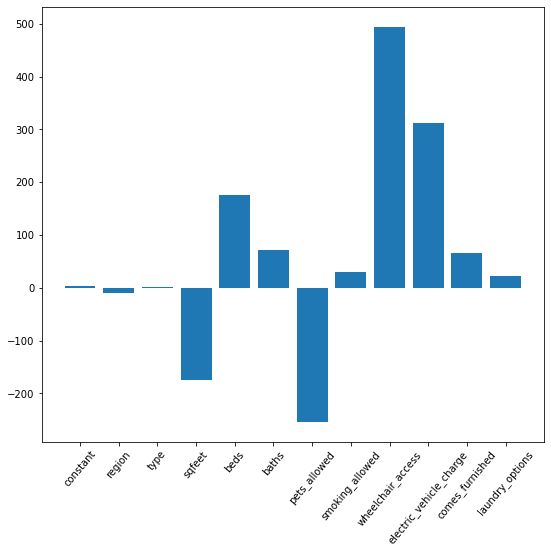

In [31]:
#### Feature importance
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
linear_importance = lr.coef_
# summarize feature importance
for i,v in enumerate(linear_importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.subplots(figsize=(9,8))
plt.bar([x for x in range(len(linear_importance))], linear_importance)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['constant','region','type', 'sqfeet', 'beds','baths','pets_allowed', 'smoking_allowed','wheelchair_access', 'electric_vehicle_charge','comes_furnished', 'laundry_options'],rotation=50)
plt.show();

In [32]:
y_pred=lr.predict(x_test)
lr_r2=metrics.r2_score(y_test, y_pred)
lr_MSE=metrics.mean_squared_error(y_test, y_pred)
lr_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [33]:
print("R^2 Score:", lr_r2)
print("MSE Score:", lr_MSE)
print("RMSE Score:", lr_RMSE)

R^2 Score: 0.26506620743445664
MSE Score: 414077.18758178054
RMSE Score: 643.4882963829106


In [34]:
pred_graph_lr=pd.DataFrame({"True Values":y_test, "Predicted Values":y_pred})
pred_graph_lr

True Values  Predicted Values
6197           1695       1946.620542
4669           4495       2445.107512
368198         1400       1851.452920
382632         2159       1983.120255
370019          825       1324.090259
...             ...               ...
1488           1625       1744.324844
368696         1099       1574.937184
370705          999       1740.221856
10834          1265       1588.812297
381463         2185       1876.054342

[9609 rows x 2 columns]

In [35]:
fig=px.scatter(pred_graph_lr, x="True Values", y="Predicted Values")
fig.show()

### Regression--XGBRegressor

In [36]:
#pip install xgboost

In [37]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train, y_train)
y_pred=xgb.predict(x_test)
xgb_r2=metrics.r2_score(y_test, y_pred)
xgb_MSE=metrics.mean_squared_error(y_test, y_pred)
xgb_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

Feature: 0, Score: 0.28266
Feature: 1, Score: 0.03278
Feature: 2, Score: 0.08852
Feature: 3, Score: 0.03096
Feature: 4, Score: 0.09963
Feature: 5, Score: 0.04137
Feature: 6, Score: 0.06299
Feature: 7, Score: 0.03522
Feature: 8, Score: 0.13747
Feature: 9, Score: 0.04576
Feature: 10, Score: 0.08862
Feature: 11, Score: 0.05402


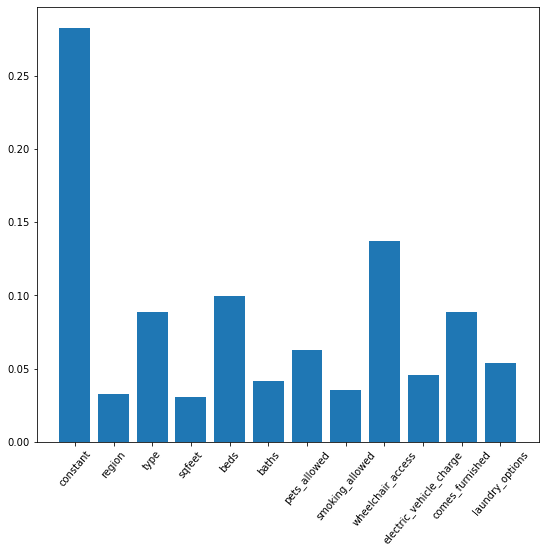

In [38]:
#### Get importance
importance_xgb = xgb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_xgb):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.subplots(figsize=(9,8))
plt.bar([x for x in range(len(importance_xgb))], importance_xgb)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['constant','region','type', 'sqfeet', 'beds','baths','pets_allowed', 'smoking_allowed','wheelchair_access', 'electric_vehicle_charge','comes_furnished', 'laundry_options'],rotation=50)
plt.show();

In [39]:
print("R^2 Score:", xgb_r2)
print("MSE Score:", xgb_MSE)
print("RMSE Score:", xgb_RMSE)

R^2 Score: 0.7839599779794856
MSE Score: 121721.50148529535
RMSE Score: 348.8860866891876


In [40]:
pred_graph_xgb=pd.DataFrame({"True Values":y_test, "Predicted Values":y_pred})
pred_graph_xgb

True Values  Predicted Values
6197           1695       1641.726929
4669           4495       3504.968018
368198         1400       1377.786255
382632         2159       1907.858887
370019          825        879.402771
...             ...               ...
1488           1625       1555.666016
368696         1099       1064.287354
370705          999        990.775757
10834          1265       1238.101074
381463         2185       2239.496826

[9609 rows x 2 columns]

In [41]:
fig=px.scatter(pred_graph_xgb, x="True Values", y="Predicted Values")
fig.show()

In [42]:
models={"LR":[lr_r2, lr_MSE , lr_RMSE],
       "XGB":[xgb_r2, xgb_MSE, xgb_RMSE],
       "GBR":[gbr_r2, gbr_MSE , gbr_RMSE],}
models=pd.DataFrame(models)
models=models.rename(index={0:"R^2", 1:"MSE", 2:"RMSE"})

In [43]:
models

LR            XGB            GBR
R^2        0.265066       0.783960       0.695947
MSE   414077.187582  121721.501485  171309.731687
RMSE     643.488296     348.886087     413.895798

Text(0.5, 1.0, 'GBR')

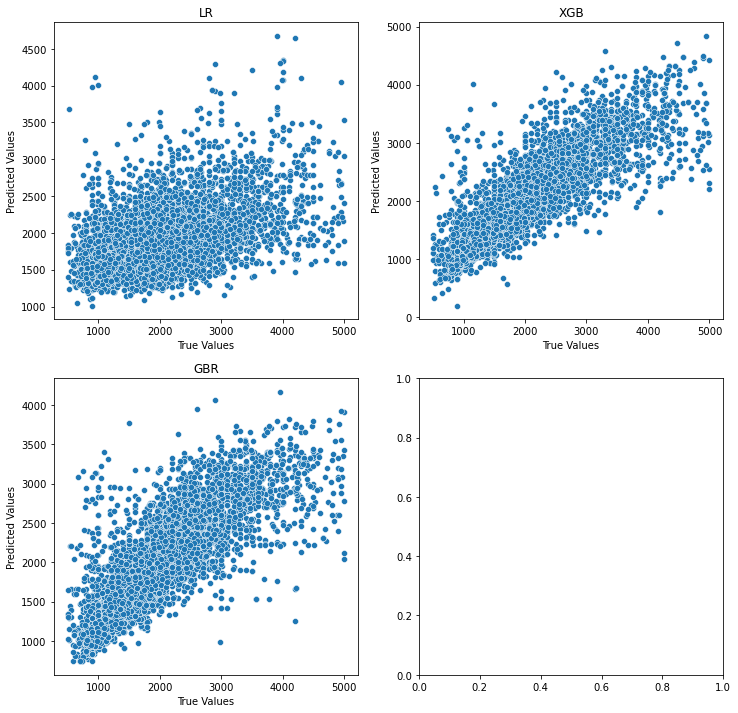

In [44]:
fig , axes= plt.subplots(2, 2, figsize=(12,12))

sns.scatterplot(ax=axes[0,0], data=pred_graph_lr, x="True Values", 
                y="Predicted Values").set_title("LR")

sns.scatterplot(ax=axes[0,1], data=pred_graph_xgb, x="True Values",
                y="Predicted Values").set_title("XGB")

sns.scatterplot(ax=axes[1,0], data=pred_graph_gbr, x="True Values",
                y="Predicted Values").set_title("GBR")

### CA Housing Price Prediction

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()  # linear regression
random_forest = RandomForestRegressor(random_state=0) # random forest
decision_tree = DecisionTreeRegressor(random_state=0) # decision tree

model_dict = {  # dict of methods we use
    "Linear Regression" : linear_regression,
    "Random Forest" : random_forest,
    "Decision Tree" : decision_tree          
    }


{'Linear Regression': 0.26506620743445664, 'Random Forest': 0.8108901634963777, 'Decision Tree': 0.6999813149886673}


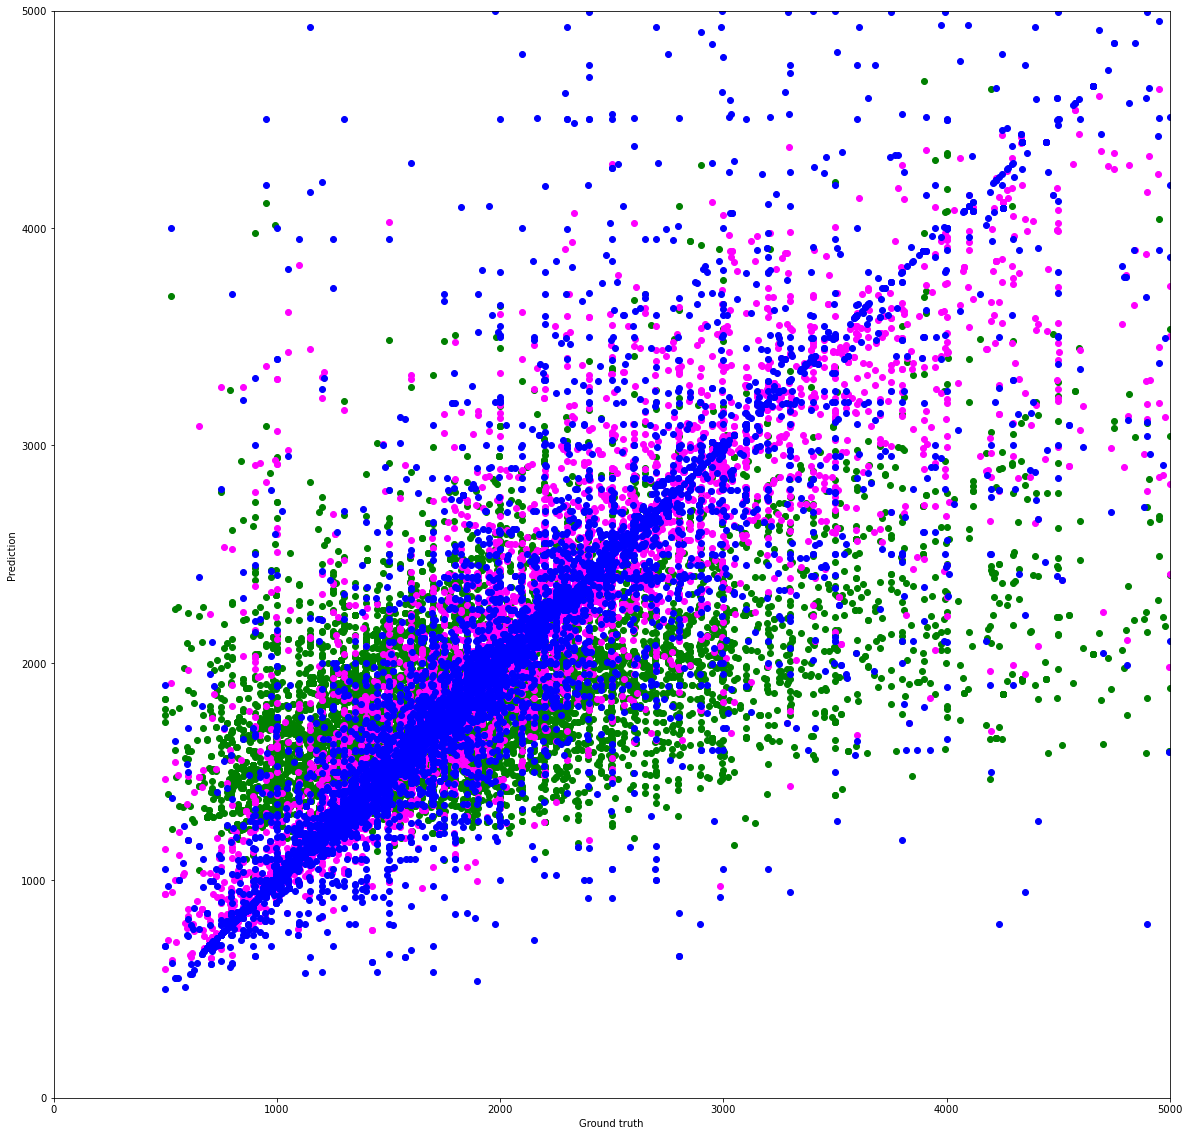

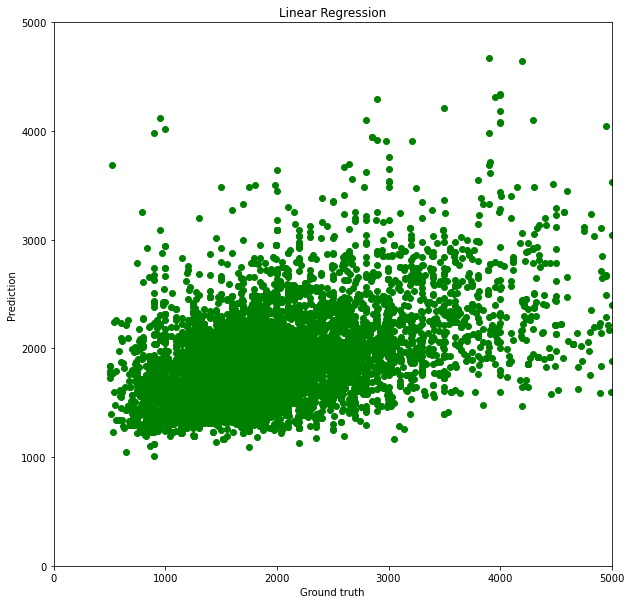

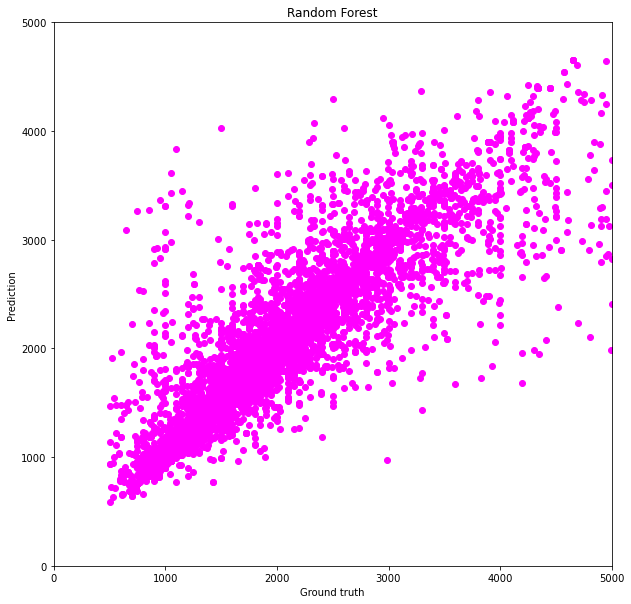

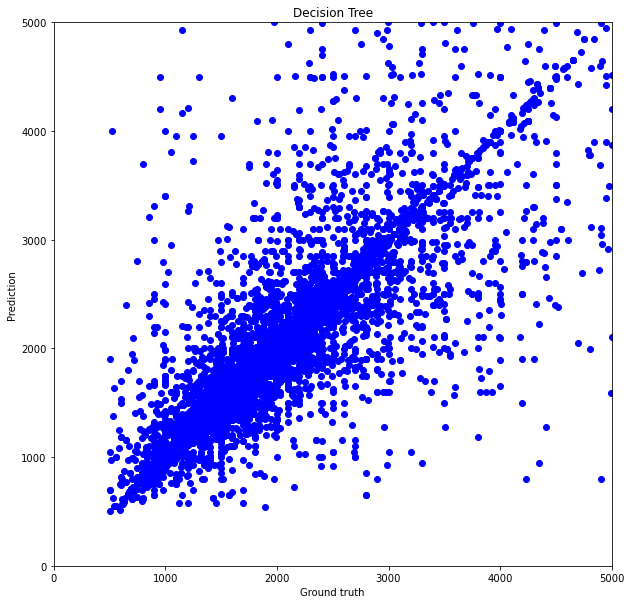

In [46]:
results_dict = {}
colors = ['green', 'magenta','blue']  # colors for plotting
index = 0;
prediction = []  # record prediction results
ground_truth = [] # copy of gound truth
plt.figure(figsize=(20, 20))

for model in model_dict:    
    current_model = model_dict.get(model)  # get model
    current_model.fit(x_train, y_train)  # train model
    y_pred=current_model.predict(x_test)  # predict
    
    # plot figures
    prediction.append(y_pred)
    ground_truth.append(y_test) 
    graph=pd.DataFrame({"True Values":y_test, "Predicted Values":y_pred})
    plt.xlabel('Ground truth')
    plt.ylabel('Prediction')
    plt.axis([0, 5000, 0, 5000])
    plt.scatter(y_test, y_pred, c=colors[index])
    index += 1
    results_dict.update({model: current_model.score(x_test, y_test)})  # record models

print(results_dict)

models = list(model_dict.keys())

def plot_each_model_figure(model_name, index):
    plt.figure(figsize=(10, 10))
    plt.title(model_name)
    plt.xlabel('Ground truth')
    plt.ylabel('Prediction')
    plt.axis([0, 5000, 0, 5000])
    plt.scatter(ground_truth[index], prediction[index], c=colors[index])

for i in range(0, len(prediction)):  # plot figures for each model
    plot_each_model_figure(models[i], i)